In [3]:
###question1


In [4]:
#import data
import pandas as pd
data = pd.read_csv("data.csv")
#printing the last details
data.tail(5)



,Unnamed: 0.1,Unnamed: 0,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Sale Price,Legal Reference,...,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
56631,56631,56631,093 13 0B 274.00,RESIDENTIAL CONDO,320 11TH AVE S,274.0,NASHVILLE,2016-10-06,210000,20161007-0106599,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56632,56632,56632,093 13 0D 044.00,RESIDENTIAL CONDO,700 12TH AVE S,608.0,NASHVILLE,2016-10-25,338000,20161101-0115186,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56633,56633,56633,093 13 0D 048.00,RESIDENTIAL CONDO,700 12TH AVE S,613.0,NASHVILLE,2016-10-04,742000,20161010-0106889,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56634,56634,56634,093 13 0D 056.00,RESIDENTIAL CONDO,700 12TH AVE S,708.0,NASHVILLE,2016-10-26,320000,20161031-0114730,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56635,56635,56635,093 13 0D 094.00,RESIDENTIAL CONDO,700 12TH AVE S,1008.0,NASHVILLE,2016-10-27,330000,20161104-0117077,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# converting the data into dataframe
# for prediction we need to get the timeseries data
#we shall use sale price and sale date as our time series data for analysis

df  =  pd.DataFrame(data)
needed_data  = df.iloc[:, [7, 8]]
needed_data


,Sale Date,Sale Price
0,2013-01-24,132000
1,2013-01-11,191500
2,2013-01-18,202000
3,2013-01-18,32000
4,2013-01-23,102000
...,...,...
56631,2016-10-06,210000
56632,2016-10-25,338000
56633,2016-10-04,742000
56634,2016-10-26,320000


## preparation for Linear regression

before preparing for any model we have to check if its assumptions are completed
### the assumptions for Linear regression model are as follows
- Assumptions of Normality
- Assumptions of Homogeneity of Variance
- Assumption of the Absence of Multicollinearity
- Assumption of the Absence of Auto-Correlation:


before we continue we need to remove all null values from our model


In [6]:
droped_na = needed_data.dropna()
droped_na

,Sale Date,Sale Price
0,2013-01-24,132000
1,2013-01-11,191500
2,2013-01-18,202000
3,2013-01-18,32000
4,2013-01-23,102000
...,...,...
56631,2016-10-06,210000
56632,2016-10-25,338000
56633,2016-10-04,742000
56634,2016-10-26,320000


- the next step is to visualize the data using matploit lib to check on the trend of the data

/home/lyrics/Desktop/client_project/machine_learning/4_5866234725659577923/env/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sale Price', ylabel='Density'>

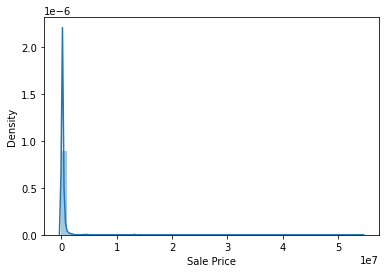

In [7]:
#import relevant stuff
import seaborn as snb
ax  =  snb.distplot(droped_na['Sale Price'])
ax

# testing assumptions
before we begin we need to make sure our assumptions are satisfied
- for normality using Kolmogorov-Smirnov test for Normality

In [8]:
from scipy.stats import kstest


In [9]:
statistics,pvalue  = kstest(droped_na['Sale Price'],'norm')

if pvalue > 0.05 :
    print("not normally distributed")
elif pvalue < 0.05:
    print("normally distributed")
    

normally distributed


> since the data is normally distributed we go to the next assumption

- test for absence of auto-correlation

In [10]:
# import relevant libraries
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.regression.linear_model import OLS
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf

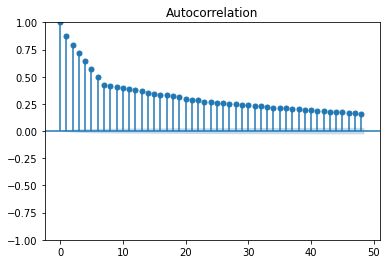

In [11]:
# Plot the autocorrelation for sale price data with 0.05 significance level
plot_acf(droped_na['Sale Price'], alpha =0.05)
plt.show()

Above is the autocorrelation plot for different lags. Here, we can see that there is some autocorrelation for significance level 0.05.

/home/lyrics/Desktop/client_project/machine_learning/4_5866234725659577923/env/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


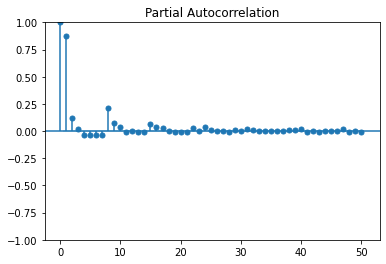

In [12]:
# Plot the partial autocorrelation for sale price data with 
# 0.05 significance level
plot_pacf(droped_na['Sale Price'], alpha =0.05, lags=50)
plt.show()

From the partial autocorrelation, Here, we can see for a 0.05 level of significance there is some partial autocorrelation for the different values of lags. For lag 0 the 100% partial autocorrelation is obvious but for lag 1 also the partial autocorrelation is very high.

### fiting linear regression model

- convert sale date to date 


In [13]:
droped_na['Converted'] = pd.to_datetime(droped_na['Sale Date'])
droped_na

,Sale Date,Sale Price,Converted
0,2013-01-24,132000,2013-01-24
1,2013-01-11,191500,2013-01-11
2,2013-01-18,202000,2013-01-18
3,2013-01-18,32000,2013-01-18
4,2013-01-23,102000,2013-01-23
...,...,...,...
56631,2016-10-06,210000,2016-10-06
56632,2016-10-25,338000,2016-10-25
56633,2016-10-04,742000,2016-10-04
56634,2016-10-26,320000,2016-10-26


- convert datetime object to float64 object

In [14]:
dff = droped_na.set_index('Converted', append=False)
dff

,Sale Date,Sale Price
Converted,,
2013-01-24,2013-01-24,132000
2013-01-11,2013-01-11,191500
2013-01-18,2013-01-18,202000
2013-01-18,2013-01-18,32000
2013-01-23,2013-01-23,102000
...,...,...
2016-10-06,2016-10-06,210000
2016-10-25,2016-10-25,338000
2016-10-04,2016-10-04,742000


- convert datetime object to float64 object

In [15]:
dff = dff.index.to_julian_date()
dff

Float64Index([2456316.5, 2456303.5, 2456310.5, 2456310.5, 2456315.5, 2456296.5,
              2456299.5, 2456307.5, 2456317.5, 2456301.5,
              ...
              2457681.5, 2457682.5, 2457672.5, 2457664.5, 2457675.5, 2457667.5,
              2457686.5, 2457665.5, 2457687.5, 2457688.5],
             dtype='float64', name='Converted', length=56636)

In [16]:
#import relevant stuff
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import datetime as dt

In [17]:
droped_na['New Line'] = droped_na['Converted'].map(dt.datetime.toordinal)
droped_na

,Sale Date,Sale Price,Converted,New Line
0,2013-01-24,132000,2013-01-24,734892
1,2013-01-11,191500,2013-01-11,734879
2,2013-01-18,202000,2013-01-18,734886
3,2013-01-18,32000,2013-01-18,734886
4,2013-01-23,102000,2013-01-23,734891
...,...,...,...,...
56631,2016-10-06,210000,2016-10-06,736243
56632,2016-10-25,338000,2016-10-25,736262
56633,2016-10-04,742000,2016-10-04,736241
56634,2016-10-26,320000,2016-10-26,736263


In [18]:
x = droped_na['New Line'].values.reshape(-1,1)
x

array([[734892],
       [734879],
       [734886],
       ...,
       [736241],
       [736263],
       [736264]])

In [19]:
#getting x and y cordinate from data

y = droped_na['Sale Price'].values.reshape(-1,1)
y


array([[132000],
       [191500],
       [202000],
       ...,
       [742000],
       [320000],
       [330000]])

In [55]:
regressor = LinearRegression()
regressor.fit(x,y)
lr = LinearRegression().fit(x,y)
predicted_linear = lr.predict(y)
predicted_linear 

array([[-30666566.57696049],
       [-27611535.04415427],
       [-27072411.83248258],
       ...,
       [   653924.76777556],
       [-21013693.8346484 ],
       [-20500243.15686584]])

# Decision Tree Model

the first thing we do is get important attributes that will help in decion from our datase into a dataframe


In [21]:
ds_frame = df.iloc[:, 3:9]
ds_frame

,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Sale Price
0,RESIDENTIAL CONDO,1208 3RD AVE S,8,NASHVILLE,2013-01-24,132000
1,SINGLE FAMILY,1802 STEWART PL,NaN,NASHVILLE,2013-01-11,191500
2,SINGLE FAMILY,2761 ROSEDALE PL,NaN,NASHVILLE,2013-01-18,202000
3,SINGLE FAMILY,224 PEACHTREE ST,NaN,NASHVILLE,2013-01-18,32000
4,SINGLE FAMILY,316 LUTIE ST,NaN,NASHVILLE,2013-01-23,102000
...,...,...,...,...,...,...
56631,RESIDENTIAL CONDO,320 11TH AVE S,274.0,NASHVILLE,2016-10-06,210000
56632,RESIDENTIAL CONDO,700 12TH AVE S,608.0,NASHVILLE,2016-10-25,338000
56633,RESIDENTIAL CONDO,700 12TH AVE S,613.0,NASHVILLE,2016-10-04,742000
56634,RESIDENTIAL CONDO,700 12TH AVE S,708.0,NASHVILLE,2016-10-26,320000


#### Drop less needed raws from dataframe

this is what will aid us in making the decion tree model

In [22]:
new_droped = ds_frame.drop(['Property Address','Suite/ Condo   #','Sale Date'],axis='columns')
new_droped.tail(3)

,Land Use,Property City,Sale Price
56633,RESIDENTIAL CONDO,NASHVILLE,742000
56634,RESIDENTIAL CONDO,NASHVILLE,320000
56635,RESIDENTIAL CONDO,NASHVILLE,330000


convert sale price greater than 700k to 1 and less than 700k to 0 

In [23]:
def loop_all(array):
    nw = []
    for m in array:
        if(m > 700000):
            nw.append(1)
        else:
            nw.append(0)
    return nw

In [24]:
ds_frame['new Sale Price'] = loop_all(ds_frame['Sale Price'])
ds_frame

,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Sale Price,new Sale Price
0,RESIDENTIAL CONDO,1208 3RD AVE S,8,NASHVILLE,2013-01-24,132000,0
1,SINGLE FAMILY,1802 STEWART PL,NaN,NASHVILLE,2013-01-11,191500,0
2,SINGLE FAMILY,2761 ROSEDALE PL,NaN,NASHVILLE,2013-01-18,202000,0
3,SINGLE FAMILY,224 PEACHTREE ST,NaN,NASHVILLE,2013-01-18,32000,0
4,SINGLE FAMILY,316 LUTIE ST,NaN,NASHVILLE,2013-01-23,102000,0
...,...,...,...,...,...,...,...
56631,RESIDENTIAL CONDO,320 11TH AVE S,274.0,NASHVILLE,2016-10-06,210000,0
56632,RESIDENTIAL CONDO,700 12TH AVE S,608.0,NASHVILLE,2016-10-25,338000,0
56633,RESIDENTIAL CONDO,700 12TH AVE S,613.0,NASHVILLE,2016-10-04,742000,1
56634,RESIDENTIAL CONDO,700 12TH AVE S,708.0,NASHVILLE,2016-10-26,320000,0


### creating the target

In [25]:
target = ds_frame['new Sale Price']
target.tail(8)

56628    0
56629    0
56630    0
56631    0
56632    0
56633    1
56634    0
56635    0
Name: new Sale Price, dtype: int64

creating labels for other variables

In [26]:
from sklearn.preprocessing import LabelEncoder
land_use = LabelEncoder()
property_ = LabelEncoder()


input the labels in the dataframe

In [27]:
ds_frame['land_use'] = land_use.fit_transform(ds_frame['Land Use'])
ds_frame['property_city'] = property_.fit_transform(ds_frame['Property City'])
ds_frame


,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Sale Price,new Sale Price,land_use,property_city
0,RESIDENTIAL CONDO,1208 3RD AVE S,8,NASHVILLE,2013-01-24,132000,0,24,9
1,SINGLE FAMILY,1802 STEWART PL,NaN,NASHVILLE,2013-01-11,191500,0,26,9
2,SINGLE FAMILY,2761 ROSEDALE PL,NaN,NASHVILLE,2013-01-18,202000,0,26,9
3,SINGLE FAMILY,224 PEACHTREE ST,NaN,NASHVILLE,2013-01-18,32000,0,26,9
4,SINGLE FAMILY,316 LUTIE ST,NaN,NASHVILLE,2013-01-23,102000,0,26,9
...,...,...,...,...,...,...,...,...,...
56631,RESIDENTIAL CONDO,320 11TH AVE S,274.0,NASHVILLE,2016-10-06,210000,0,24,9
56632,RESIDENTIAL CONDO,700 12TH AVE S,608.0,NASHVILLE,2016-10-25,338000,0,24,9
56633,RESIDENTIAL CONDO,700 12TH AVE S,613.0,NASHVILLE,2016-10-04,742000,1,24,9
56634,RESIDENTIAL CONDO,700 12TH AVE S,708.0,NASHVILLE,2016-10-26,320000,0,24,9


drop other values since we have transformed the labels into digit labels

In [28]:
inputs_n = ds_frame.drop(['new Sale Price','Land Use','Property City','Property Address','Suite/ Condo   #','Sale Date','Sale Date','Sale Price'],axis='columns')
inputs_n

,land_use,property_city
0,24,9
1,26,9
2,26,9
3,26,9
4,26,9
...,...,...
56631,24,9
56632,24,9
56633,24,9
56634,24,9


### import sklearn decision tree classifier

In [29]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

### fitting decision tree classifier model

In [30]:
model.fit(inputs_n, target)

DecisionTreeClassifier()

### checking the accuracy score of the model

In [31]:
model.score(inputs_n,target)

0.944717141041034

* since the accuracy is less 0.056 then the model is a good fit

## decision tree prediction


is resident condo land use and nashville city greater than 700k?

In [32]:
model.predict([[24,9]])

/home/lyrics/Desktop/client_project/machine_learning/4_5866234725659577923/env/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

since the array return 0 we can see that resident house mostly are less than 700k

# Random Forest Model

In [33]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(inputs_n,target)

RandomForestClassifier(n_estimators=20)

checking the score of the random forest 

In [34]:
model.score(inputs_n,target)

0.944717141041034

since the score is atleast 0.944 then we can take it as being a good fit and continue with our prediction

In [35]:
y_predicted = model.predict(inputs_n)

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(target, y_predicted)
cm

array([[53373,    27],
       [ 3104,   132]])

Text(69.0, 0.5, 'Truth')

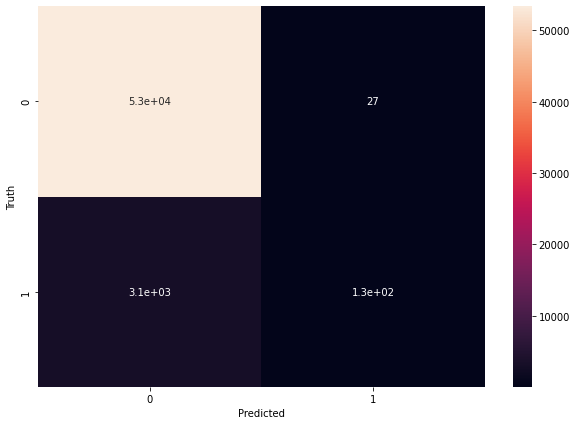

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Gradient Boost Model

### import required  values

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

In [39]:
model_gbm = GradientBoostingClassifier(n_estimators=5000,
                                       learning_rate=0.05,
                                       max_depth=3,
                                       subsample=0.5,
                                       validation_fraction=0.1,
                                       n_iter_no_change=20,
                                       max_features='log2',
                                       verbose=1)
model_gbm.fit(inputs_n,target)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.4294           0.0027            1.78m
         2           0.4340           0.0029            1.57m
         3           0.4327           0.0017            1.48m
         4           0.4300           0.0022            1.43m
         5           0.4231           0.0020            1.42m
         6           0.4277           0.0008            1.39m
         7           0.4220           0.0010            1.37m
         8           0.4273           0.0015            1.36m
         9           0.4283           0.0013            1.35m
        10           0.4191           0.0003            1.34m
        20           0.4238           0.0006            1.32m
        30           0.4082           0.0002            1.31m
        40           0.4085           0.0002            1.30m
        50           0.4164           0.0002            1.31m
        60           0.4034           0.0001            1.30m
       

GradientBoostingClassifier(learning_rate=0.05, max_features='log2',
                           n_estimators=5000, n_iter_no_change=20,
                           subsample=0.5, verbose=1)

- checking for the estimators

In [40]:
len(model_gbm.estimators_)

269

In [41]:
y_valid_pred = model_gbm.predict_proba(inputs_n)[:,1]

In [42]:
plt.figure(figsize=(12,5))

<Figure size 864x360 with 0 Axes>

<Figure size 864x360 with 0 Axes>

## Look at performance with respect to number of trees

staged_predict_proba function allows us to look at predictions at for different number of trees in the model

In [47]:
y_valid_pred_trees = np.stack(list(model_gbm.staged_predict_proba(inputs_n)))[:,:,1]
y_valid_pred_trees.shape

(269, 56636)

### plot prediction 

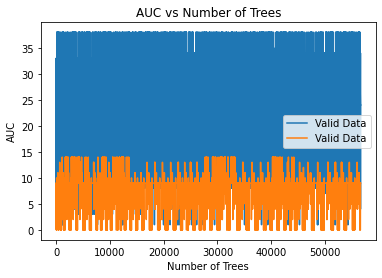

In [52]:
plt.plot(inputs_n, label='Valid Data')

plt.title('AUC vs Number of Trees')
plt.ylabel('AUC')
plt.xlabel('Number of Trees')
plt.legend()

plt.show()

# Bench Marking Metrics

in order to choose the right model to use we shall use model evaluation procedure to accomplish this 

- we shall thus estimate the likely performance of this model and then we shall use that estimation to choose the right model to use .


### 1) train and set on the entire dataset 

- with this we can be able to see how a given predicted dataset worked as compared to the real dataset
- we shall use classifaction accuracy technique to achieve this

<em> mean squread error for linear regression</em>

In [63]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [64]:
# calculate errors
errors = mean_squared_error(droped_na['Sale Price'], predicted_linear )
# report error
print(errors)

2626003281613673.5


<em></em>